### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
rating_df = pd.read_csv('Data.csv')
user_df = pd.read_csv('user.csv')
movie_df = pd.read_csv('item.csv')

rating_df.head()
#user_df.head()
#movie_df.head()


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [4]:
def has_nan(df):
    return any(df.isnull().any())

def count_nan_1(df):
    return sum(df.isnull().sum())

def count_nan_2(df):
    return df.size - sum(df.count())

def print_miss_info(df, name):
    print('{} - missing values'.format(name))
    print(' - Has?         :', has_nan(df))
    print(' - Count (way 1):', count_nan_1(df))
    print(' - Count (way 2):', count_nan_2(df))

# info() & describe() calls are commented out for the cleaner output    
print('Uncomment info() & describe() calls to view data individually per DataFrame')
    
#rating_df.info()
#rating_df.describe().T
print('\nRating Shape', rating_df.shape)
print_miss_info(rating_df, 'Rating')

#user_df.info()
#user_df.describe().T
print('\nUser Shape', user_df.shape)
print_miss_info(user_df, 'User')

#movie_df.info()
#movie_df.describe().T
print('\nMovie Shape', movie_df.shape)
print_miss_info(movie_df, 'Movie')



Uncomment info() & describe() calls to view data individually per DataFrame

Rating Shape (100000, 4)
Rating - missing values
 - Has?         : False
 - Count (way 1): 0
 - Count (way 2): 0

User Shape (943, 5)
User - missing values
 - Has?         : False
 - Count (way 1): 0
 - Count (way 2): 0

Movie Shape (1681, 22)
Movie - missing values
 - Has?         : False
 - Count (way 1): 0
 - Count (way 2): 0


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [5]:
# clean the dataframe
genre_columns = movie_df.columns[3:]

# sum up values for each genre
movie_df[genre_columns].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [8]:
# Before
print('Before: ', movie_df.shape)

# Way 1 - dataframe filtering
movies_without_unknown1 = movie_df[~(movie_df['unknown'] == 1)]
print('After (way 1): ', movies_without_unknown1.shape)

# Way 2 - dataframe drop()
movies_without_unknown2 = movie_df.drop(movie_df[movie_df['unknown'] == 1].index, inplace=False)
print('After (way 1): ', movies_without_unknown2.shape)


Before:  (1681, 22)
After (way 1):  (1680, 22)
After (way 1):  (1680, 22)


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [9]:
movies_with_genres_count = movie_df.copy()

movies_with_genres_count['genre_count'] = movie_df[genre_columns].sum(axis=1)
has_multiple_ganres = movies_with_genres_count['genre_count'] > 1
movies_with_multiple_genres = movies_with_genres_count[has_multiple_ganres][['movie title', 'genre_count']].sort_values('genre_count', ascending=False)

print('Total # of movies with multiple genres (way 1):', sum(has_multiple_ganres))
print('Total # of movies with multiple genres (way 2):', movies_with_multiple_genres.shape[0])
print('\n')
print(movies_with_multiple_genres)


Total # of movies with multiple genres (way 1): 849
Total # of movies with multiple genres (way 2): 849


                         movie title  genre_count
171        Empire Strikes Back, The             6
558   Kid in King Arthur's Court, A             6
424    Transformers: The Movie, The             6
753                         Jumanji             5
16              From Dusk Till Dawn             5
...                              ...          ...
703             Singin' in the Rain             2
707               Strictly Ballroom             2
710                         Tin Men             2
712                      Carrington             2
1678                  Sliding Doors             2

[849 rows x 2 columns]


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

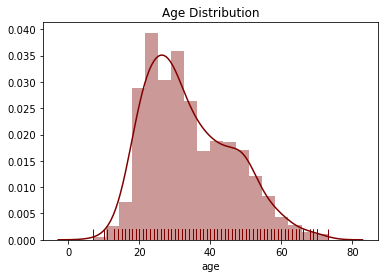

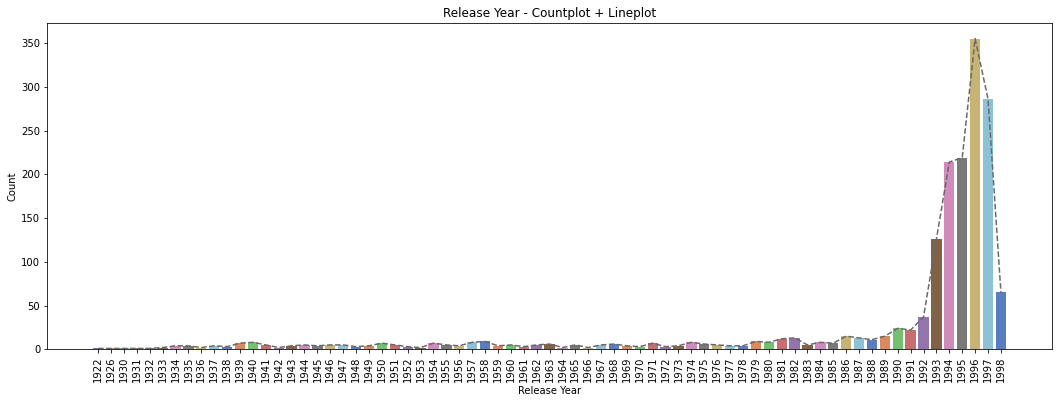

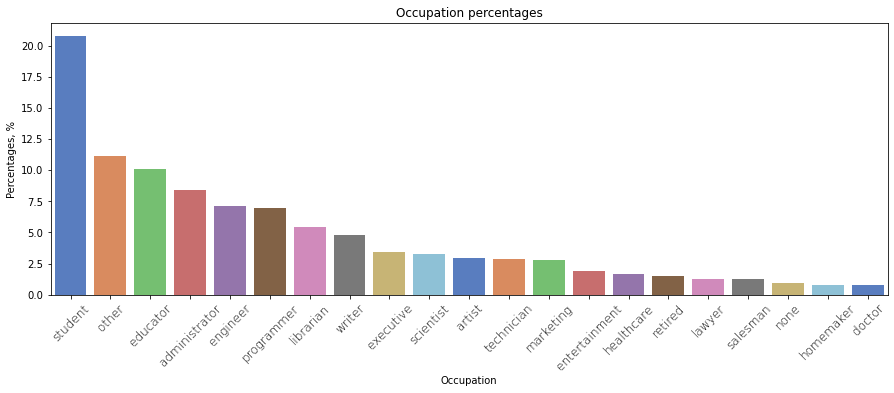

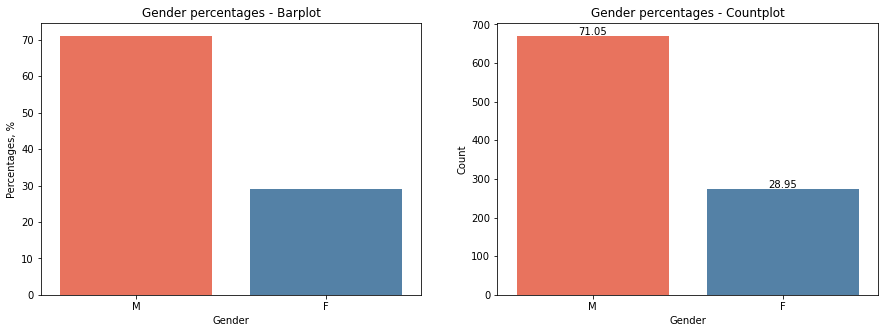

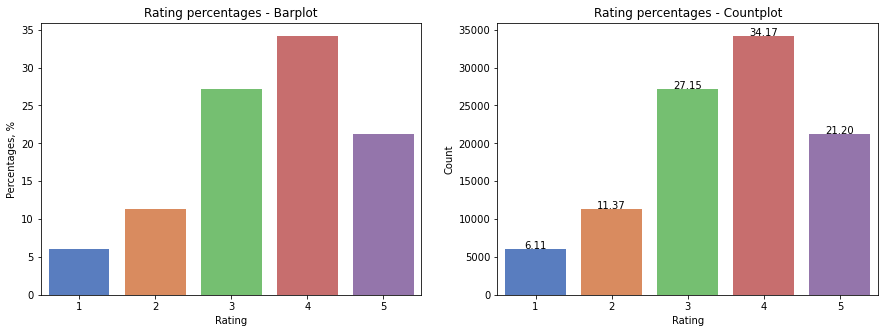

In [10]:
# Age Distribution
sns.distplot(user_df['age'], kde=True, rug=True, color='maroon');
plt.title('Age Distribution')
plt.show()

# Release Year (date + countplot / split + lineplot)
fig, ax = plt.subplots( sharex=True, sharey=True, figsize=(18,6))

# datetime + countplot
release_year_series = movie_df['release date'].apply(lambda x : datetime.strptime(x, '%d-%b-%Y').year)
chart_release_year1 = sns.countplot(release_year_series, palette='muted', ax=ax);
chart_release_year1.set_xticklabels(chart_release_year1.get_xticklabels(),  rotation=90)

# split + lineplot
movie_by_year_df = movie_df.copy()
movie_by_year_df['release year'] = movie_df['release date'].apply(lambda x : x.split('-')[2])
movie_by_year_df = movie_by_year_df.groupby('release year').count().reset_index().rename(columns={'movie id':'count'})
chart_release_year2 = sns.lineplot(x='release year', y='count', data=movie_by_year_df, ax=ax, color = 'dimgray');
chart_release_year2.lines[0].set_linestyle("--")
chart_release_year2.set_xticklabels(chart_release_year1.get_xticklabels(), rotation=90) #re-use/fix labels

plt.title('Release Year - Countplot + Lineplot')
plt.xlabel('Release Year')
plt.ylabel("Count")
plt.show()


# Calculate percentage for given category variable
def get_cat_vs_percentage(df, cat_col, agg_col):
    return df.groupby(cat_col).count().apply(lambda x: x/x.sum()*100).reset_index()[[agg_col, cat_col]].rename(columns={agg_col: 'percentage'})

# Occupation percentage in %
occupation_percentage_df = get_cat_vs_percentage(user_df, 'occupation', 'user id').sort_values(by=['percentage'], ascending=False)

plt.figure(figsize=(15,5))
chart_occupation = sns.barplot(x='occupation', y='percentage', data=occupation_percentage_df, palette='muted')
chart_occupation.set_xticklabels(chart_occupation.get_xticklabels(), rotation=45, fontweight='light', fontsize='large')
chart_occupation.set(
    title='Occupation percentages',
    xlabel='Occupation',
    ylabel='Percentages, %')
plt.show()

 
# Gender percentage in %
plt.figure(figsize=(15,5))

# Gender percentage in % - using barplot
gender_percentage_df = get_cat_vs_percentage(user_df, 'gender', 'user id')
gender_percentage_df.sort_values('percentage', ascending=False, inplace=True)
plt.subplot(1, 2, 1)
chart = sns.barplot(x='gender', y='percentage', data=gender_percentage_df, palette=['tomato', 'steelblue'])
chart.set(
    title='Gender percentages - Barplot',
    xlabel='Gender',
    ylabel='Percentages, %')

# Gender percentage in % - using caountplot
total_users = user_df['user id'].count();
plt.subplot(1, 2, 2)
chart = sns.countplot(user_df['gender'],  palette=['tomato', 'steelblue']);
chart.set(
    title='Gender percentages - Countplot',
    xlabel='Gender',
    ylabel='Count')
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x() + p.get_width()/2., height + 3, '{:1.2f}'.format((height/total_users)*100), ha='center') 

plt.show()

# Ratings percentage in %
plt.figure(figsize=(15,5))

# Ratings percentage in % - Barplot
rating_percentage_df = get_cat_vs_percentage(rating_df, 'rating', 'user id')
plt.subplot(1, 2, 1)
chart = sns.barplot(x='rating', y='percentage', data=rating_percentage_df, palette='muted')
chart.set(
    title='Rating percentages - Barplot',
    xlabel='Rating',
    ylabel='Percentages, %')

# Ratings percentage in % - Countplot
total_ratings = rating_df.shape[0]
plt.subplot(1, 2, 2)
chart = sns.countplot(rating_df['rating'], palette='muted');
chart.set(
    title='Rating percentages - Countplot',
    xlabel='Rating',
    ylabel='Count')
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x() + p.get_width()/2.0, height, '{:1.2f}'.format((height/total_ratings)*100), ha='center') 

plt.show()


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

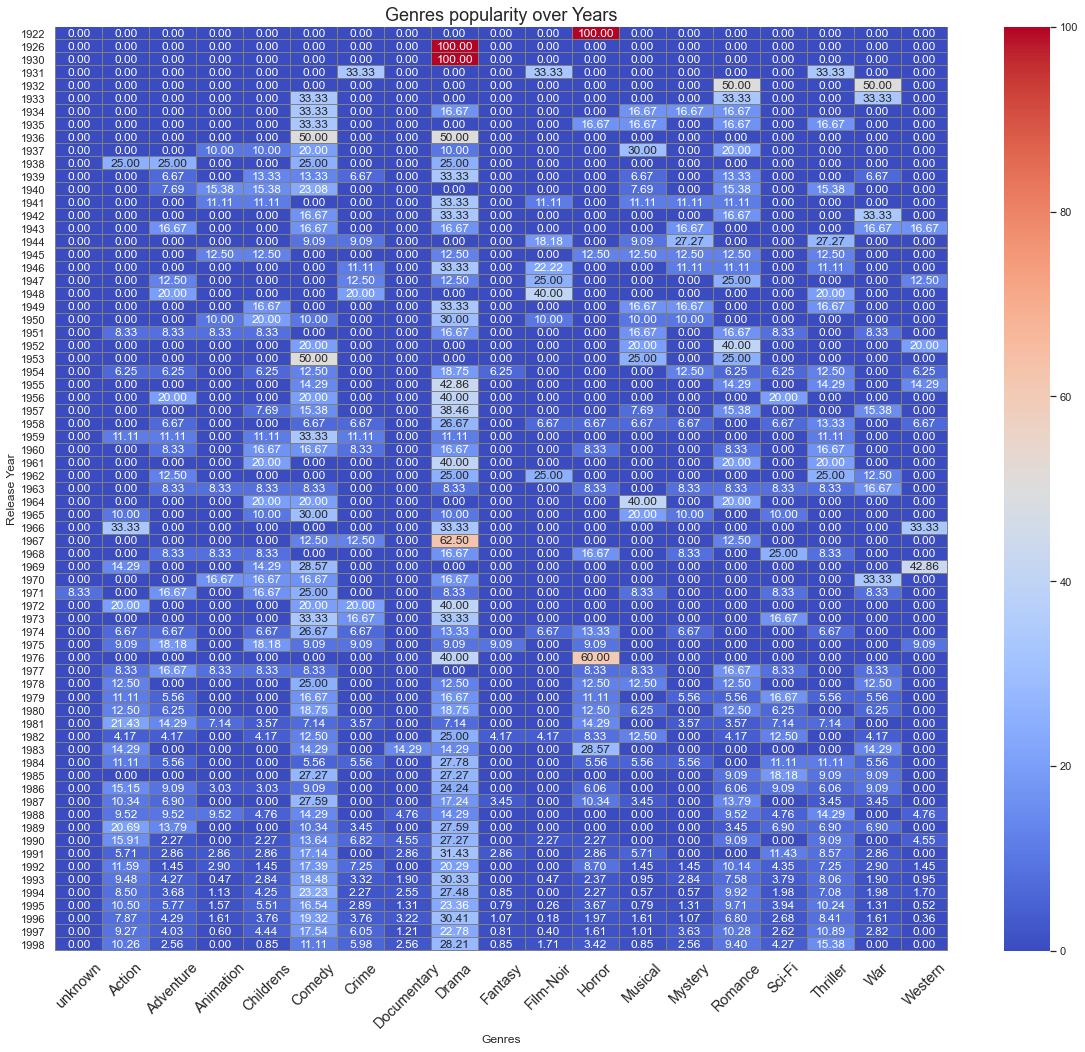

In [11]:
genres_by_year_df = movie_df.copy()
genres_by_year_df['release year'] = movie_df['release date'].apply(lambda x : datetime.strptime(x, '%d-%b-%Y').year)
genres_by_year_df.drop(['movie id', 'movie title', 'release date'], axis=1, inplace=True)
genres_by_year_df = genres_by_year_df.groupby('release year').sum()
genres_by_year_df['total'] = genres_by_year_df.sum(axis=1)
genres_by_year_df = genres_by_year_df.div(genres_by_year_df['total'], axis= 0) * 100
genres_by_year_df.drop('total', axis=1, inplace=True)

sns.set()
plt.figure(figsize=(20, 17))
heatmap = sns.heatmap(genres_by_year_df, annot=True, linewidths=0.01, linecolor='gray', fmt= '.2f', cmap='coolwarm') # Blues magma, cubehelix, YlGnBu
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontweight='light', fontsize='large')
plt.title('Genres popularity over Years', fontdict={'fontsize':18})
plt.ylabel('Release Year')
plt.xlabel('Genres')
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

    movie id       avg  count  \
0        408  4.491071    112   
1        318  4.466443    298   
2        169  4.466102    118   
3        483  4.456790    243   
4         64  4.445230    283   
5        603  4.387560    209   
6         12  4.385768    267   
7         50  4.358491    583   
8        178  4.344000    125   
9        134  4.292929    198   
10       427  4.292237    219   
11       357  4.291667    264   
12        98  4.289744    390   
13       480  4.284916    179   
14       127  4.283293    413   
15       285  4.265432    162   
16       272  4.262626    198   
17       657  4.259542    131   
18       474  4.252577    194   
19       174  4.252381    420   
20       479  4.251397    179   
21       313  4.245714    350   
22       511  4.231214    173   
23       484  4.210145    138   
24       172  4.204360    367   

                                          movie title  
0                                     Close Shave, A   
1                            

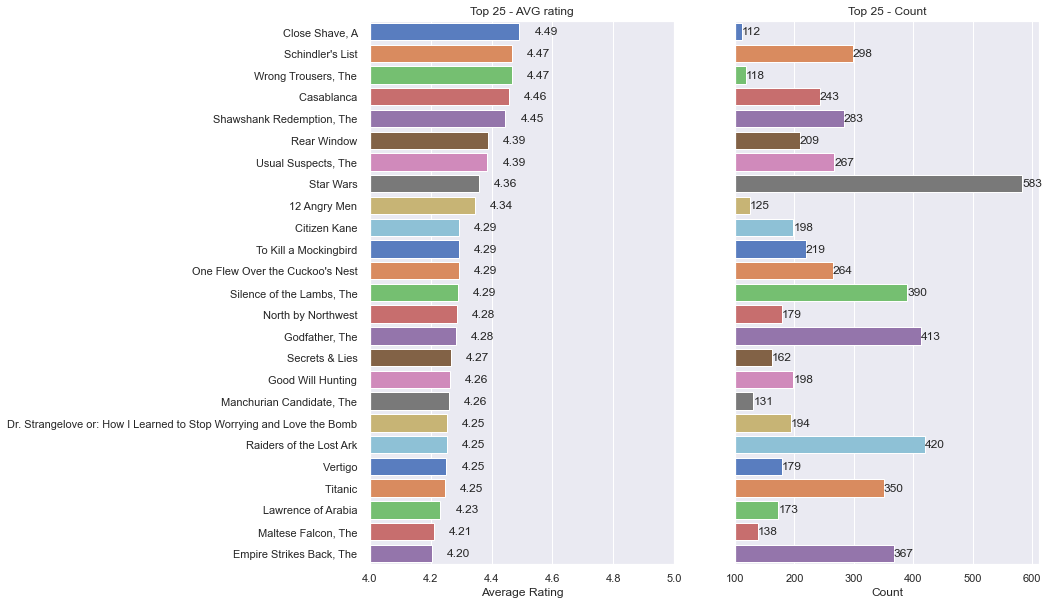

In [12]:
guoped_ratings = rating_df[['movie id', 'rating']].groupby('movie id')

ratings_avg = guoped_ratings.mean().rename(columns={'rating':'avg'})
ratings_count = guoped_ratings.count().rename(columns={'rating':'count'})

# Join two DataFrames
# Version 1
# ratings_agg = ratings_avg.join(ratings_count, how='outer')
# Version 2
ratings_agg = pd.merge(ratings_avg, ratings_count, how='inner', on='movie id')

# Select top 25 movies with heighest avg ratings and count > 100
top_25 = ratings_agg[ratings_agg['count'] > 100].sort_values(by='avg', ascending=False).head(25)

# Add movie names and reset index for the index number
movie_cleaned_df = movie_df[['movie id', 'movie title']].set_index('movie id')
result = top_25.join(movie_cleaned_df, how='left').reset_index()

print(result)

# Visualized Top 25
plt.figure(figsize=(12,10))

def add_bar_labels(bar_chart, value_formatter):
    for p in bar_chart.patches:
        height = p.get_height()
        width = p.get_width()
        bar_chart.text(x = width + 0.05, y = p.get_y()+(height/2), s = value_formatter(width), va = 'center')

# Top 25 by avg rating
plt.subplot(1, 2, 1)
chart = sns.barplot(x='avg', y='movie title', data=result, palette='muted')
chart.set(
    title="Top 25 - AVG rating",
    xlabel='Average Rating',
    ylabel='')
chart.set_xlim(4, 5)
add_bar_labels(chart, lambda x: '{:.02f}'.format(x))
#plt.xlim(4, 5)

# Top 25 by ratings' count
plt.subplot(1, 2, 2)
chart = sns.barplot(x='count', y='movie title', data=result, palette='muted')
chart.set(
    title="Top 25 - Count",
    xlabel='Count',
    ylabel='')
chart.set_yticklabels([])
chart.set_xlim(100,)
add_bar_labels(chart, lambda x: str(int(x)))

plt.show()


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [13]:
# Check for movie ids that are not in one of the dataframes
rating_set = set(rating_df['movie id'])
movie_set = set(movie_df['movie id'])
rating_vs_movie = list(movie_set ^ rating_set)
print('Movies that are missing either in rating or movie set:', rating_vs_movie, ', total: ', len(rating_vs_movie))
print(' - Is it in ratings set? ', rating_vs_movie[0] in rating_set)
print(' - Is it is movies set?  ', rating_vs_movie[0] in movie_set)

# Could drop usless rating rows
#rating_fixed_df = rating_df.drop(rating_df[rating_df['movie id'] == rating_vs_movie[0]].index, inplace=False)

# All users have relative ratings, no useless users

# Join only on matching movie ids
movie_and_rating = pd.merge(movie_df, rating_df, how='inner', on='movie id')

# Join only on matching user ids
mru_df = pd.merge(movie_and_rating, user_df, how='inner', on='user id')

print('\nPercentages using 1st method\n')

# Method 1 - groupby, div, sum
def get_m_f_percentage(full_df, cat):
    '''
    df  - mereged dataframe
    cat - Romance, Sci-Fi, Drama etc.
    '''
    df = full_df[['gender', cat, 'rating']]
    m_f_groups = df.groupby(['gender', cat]).count()
    m_batch_df = m_f_groups.loc['M']
    f_batch_df = m_f_groups.loc['F']
    m_batch_df['percentage'] = m_batch_df.div(m_batch_df['rating'].sum()) * 100
    f_batch_df['percentage'] = f_batch_df.div(f_batch_df['rating'].sum()) * 100

    # return only percentage of people who actually rated/watched this (cat) type of movies
    watched = 1
    return (cat, [m_batch_df.loc[watched]['percentage'], f_batch_df.loc[watched]['percentage']] )


romance = get_m_f_percentage(mru_df, 'Romance')
sci_fi = get_m_f_percentage(mru_df, 'Sci-Fi')
drama = get_m_f_percentage(mru_df, 'Drama')

result = pd.DataFrame({romance[0]: romance[1], sci_fi[0]: sci_fi[1], drama[0]: drama[1]}, index=['Male', 'Female'])
print(result)

print('\nPercentages using 2nd method\n')

# Method 2 - filter, count
def get_percentages(df, cat, sex):
    fan_count = df[(df[cat] == 1) & (df['gender'] == sex)]['user id'].count()
    no_fan_count = df[(df[cat] == 0) & (df['gender'] == sex)]['user id'].count()
    
    total = fan_count + no_fan_count
    fan_percentage = (fan_count/total) * 100
    no_fan_percentage = (no_fan_count/total) * 100
        
    return { 'total': total, 'fans': fan_count, 'no_fans': no_fan_count, 'fan_percentage': fan_percentage, 'no_fan_percentage':no_fan_percentage}

    
clean_mru = mru_df[['gender','Romance', 'Sci-Fi', 'Drama', 'user id']]

m_romance = get_percentages(clean_mru, 'Romance', 'M')
f_romance = get_percentages(clean_mru, 'Romance', 'F')

m_sci_fi = get_percentages(clean_mru, 'Sci-Fi', 'M')
f_sci_fi = get_percentages(clean_mru, 'Sci-Fi', 'F')

m_drama = get_percentages(clean_mru, 'Drama', 'M')
f_drama = get_percentages(clean_mru, 'Drama', 'F')

result2 = pd.DataFrame({'Romance': [m_romance['fan_percentage'], f_romance['fan_percentage']],
                        'Sci-Fi': [m_sci_fi['fan_percentage'], f_sci_fi['fan_percentage']],
                        'Drama': [m_drama['fan_percentage'], f_drama['fan_percentage']]},
                        index=['Male', 'Female'])
print(result2)



Movies that are missing either in rating or movie set: [267] , total:  1
 - Is it in ratings set?  True
 - Is it is movies set?   False

Percentages using 1st method

          Romance     Sci-Fi      Drama
Male    18.319799  13.603491  38.903479
Female  22.760121  10.214469  42.769446

Percentages using 2nd method

          Romance     Sci-Fi      Drama
Male    18.319799  13.603491  38.903479
Female  22.760121  10.214469  42.769446


### Results
1. Men watch more drama than women

**False**, only **38.9%** of men watch drama, compared to **42.8%** for women.

2. Women watch more Sci-Fi than men

**False**, only **10.2%** of women watch sci-fi, compared to **13.6%** for men.

3. Men watch more Romance than women

**False**, only **18.3%** of men watch romance, compared to **22.8%** for women.